<a href="https://colab.research.google.com/github/C4st3ll4n/diabetis_portfolio/blob/main/portfolio_diabetis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTAÇÕES NECESSÁRIAS

In [2]:
import numpy as np
import os
import pandas as pd
from sklearn import datasets
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# CARREGANDO O DATASET

In [3]:
X, y = datasets.load_diabetes(return_X_y=True)

## TRANSFORMANDO DE ARRAY PARA DATAFRAME

In [4]:
dfX = pd.DataFrame(X)
dfy = pd.DataFrame(y)

In [5]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       442 non-null    float64
 1   1       442 non-null    float64
 2   2       442 non-null    float64
 3   3       442 non-null    float64
 4   4       442 non-null    float64
 5   5       442 non-null    float64
 6   6       442 non-null    float64
 7   7       442 non-null    float64
 8   8       442 non-null    float64
 9   9       442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [6]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


# ANALISANDO IMPORTÂNCIA DAS FEATURES

In [8]:
DTR.feature_importances_
#Dropar coluna 1,4,5,7,9

NameError: ignored

#PLOTAR RESULTADO

In [50]:
def plot(y_true, y_pçred):
    x = np.arange(y_test.shape[0])
    plt.title("Predict")
    plt.scatter(x, y_true, c='red', label='y_true')
    plt.scatter(x, y_pred, c='blue',marker='x', label='y_pred')
    plt.legend()
    plt.show()


# TENTATIVA NÚMERO 1

Tentei gerar a árvore sem dropar as features com pouca importância

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [28]:
DTR = DecisionTreeRegressor(max_depth=3, random_state=0)

In [29]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [30]:
y_pred = DTR.predict(X_test)

In [31]:
print(mean_squared_error(y_test, y_pred))

3116.9963949158414


In [32]:
#export_graphviz(DTR, out_file="tree.dot", class_names=['y'], rounded=True, filled=True)

In [33]:
#os.system('dot -Tpng tree.dot -o regr_tree.png')

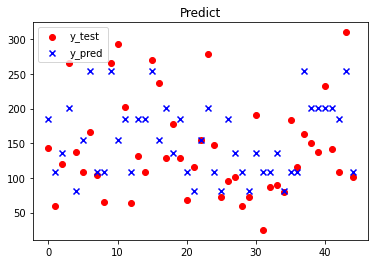

In [34]:
x = np.arange(y_test.shape[0])
plt.title("Predict")
plt.scatter(x, y_test, c='red', label='y_test')
plt.scatter(x, y_pred, c='blue',marker='x', label='y_pred')
plt.legend()
plt.show()


# TENTATIVA NÚMERO 2
1º teste => mse: 4031.250980646489

No segundo teste dropando mais colunas, não apresentou melhoras
 
2º teste => mse: 4185.718910935043

In [35]:
DTR.feature_importances_

array([0.02258669, 0.        , 0.29847606, 0.05608845, 0.        ,
       0.        , 0.        , 0.        , 0.6228488 , 0.        ])

In [36]:
#dx = dfX.drop([1,4,5,7,9],axis=1)
dx = dfX.drop([0,1,3,6,4,5,7,9],axis=1) 

In [37]:
dx.head()

,2,8
0,0.061696,0.019908
1,-0.051474,-0.068330
2,0.044451,0.002864
3,-0.011595,0.022692
4,-0.036385,-0.031991


In [38]:
X_train, X_test, y_train, y_test = train_test_split(dx, y, test_size=0.1)

In [39]:
DTR = DecisionTreeRegressor(max_depth=5, random_state=0)

In [40]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [41]:
y_pred = DTR.predict(X_test)

In [42]:
print(mean_squared_error(y_test, y_pred))

3599.0783752904636


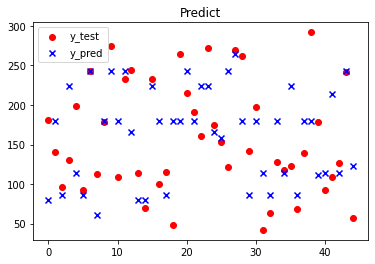

In [43]:
x = np.arange(y_test.shape[0])
plt.title("Predict")
plt.scatter(x, y_test, c='red', label='y_test')
plt.scatter(x, y_pred, c='blue',marker='x', label='y_pred')
plt.legend()
plt.show()

# TENTATIVA 3

Analisar correçlação entre váriaveis e criar um novo modelo


In [44]:
import seaborn as sns

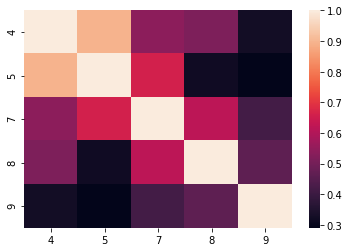

In [80]:
#na primeira execução a váriavel 6 apresentou fraca correlação, removi 
#na segunda execução as váriaveis 0,1,2,3 apresentaram fraca correlação, removi
df = dfX.drop([0,1,2,3,6],axis=1)

corr = df.corr()

sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

Gerando um novo modelo com padronização

In [64]:
from sklearn.preprocessing import StandardScaler

In [81]:
ss = StandardScaler()
ss.fit_transform(df)
#dfy = StandardScaler(y)

array([[-0.92974581, -0.73206462, -0.05449919,  0.41855058, -0.37098854],
       [-0.17762425, -0.40288615, -0.83030083, -1.43655059, -1.93847913],
       [-0.95867356, -0.71889748, -0.05449919,  0.06020733, -0.54515416],
       ...,
       [-0.78510705, -0.29096547, -0.23293356, -0.98558469,  0.32567395],
       [ 0.34307529,  0.32130649,  0.55838411,  0.93615545, -0.54515416],
       [ 1.76053515,  0.58464926, -0.83030083, -0.08871747,  0.06442552]])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1)
DTR = DecisionTreeRegressor(max_depth=5, random_state=0, min_samples_split=150)

DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_test)
print(mean_squared_error(y_test, y_pred))

4789.324021953044


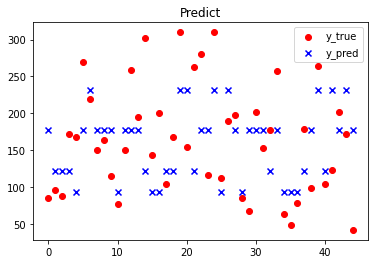

In [83]:
plot(y_test, y_pred)

# Tentativa 4

In [119]:
ddX, ddy = datasets.load_diabetes(return_X_y=True)

In [287]:
databets = datasets.load_diabetes()

In [127]:
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [240]:
diX = pd.DataFrame(ddX)
diX.columns = diabetes_data.feature_names

In [204]:
diX.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


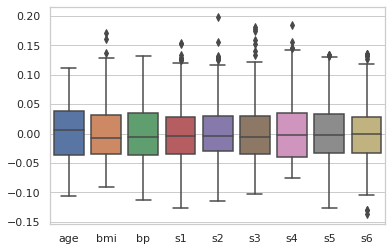

In [252]:
%matplotlib inline
sns.set(style="whitegrid")  
sns.boxplot(data=diX, )

bmi, s1, s2, s3, s4 e s6 possuem, aparentemente, muitos outliers

In [274]:
Q1 = diX.quantile(0.25)
Q3 = diX.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age    0.075375
bmi    0.065477
bp     0.072300
s1     0.062606
s2     0.060203
s3     0.064429
s4     0.073802
s5     0.065682
s6     0.061096
dtype: float64


In [290]:
from scipy import stats
z = np.abs(stats.zscore(databets.data))
#print(z)
dfo = databets.data[(z < 3).all(axis=1)]

#(diX < (Q1 - 1.5 * IQR)) |(diX > (Q3 + 1.5 * IQR))

In [285]:
diX.shape

(442, 9)

In [292]:
dfo.shape

(430, 10)

In [297]:
dfoy = dfo[:,-1] #TARGET
dfo = dfo[:,:-1] #FEATURES

In [298]:
dfoy.shape

(430,)

In [299]:
dfo.shape

(430, 9)

12 outliers foram removidos

In [103]:
diy = pd.DataFrame(ddy)

In [105]:
diy.shape

(442, 1)

In [108]:
diX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [113]:
#Quantidade de registros com valores 'setado'
diX.notna().sum()

age    442
sex    442
bmi    442
bp     442
s1     442
s2     442
s3     442
s4     442
s5     442
s6     442
dtype: int64

In [114]:
#Quantidade de registros cque não são nulos
diX.notnull().sum()

age    442
sex    442
bmi    442
bp     442
s1     442
s2     442
s3     442
s4     442
s5     442
s6     442
dtype: int64

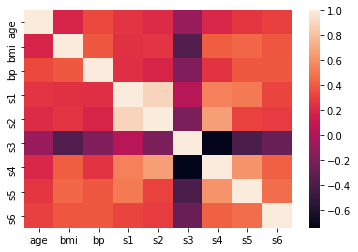

In [206]:
corr = diX.corr()

sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [242]:
diX.drop(['sex'],inplace=True, axis=1,)
#diX.drop(['age'],inplace=True, axis=1,)

In [300]:
X_train, X_test, y_train, y_test = train_test_split(dfo, dfoy, test_size=0.1)
DTR = DecisionTreeRegressor(max_depth=5, random_state=0,
                            min_samples_split=50,max_features='auto',)

DTR.fit(X_train, y_train,)
y_pred = DTR.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.002189032387818679


In [301]:
DTR.feature_importances_

array([0.04839284, 0.        , 0.18968053, 0.16574103, 0.        ,
       0.06828867, 0.07261554, 0.        , 0.45528138])

In [161]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [305]:
#salvando melhor arvore
joblib.dump(DTR,'arvore_sem_outliers.xz')

['arvore_sem_outliers.xz']

In [182]:
tree = joblib.load('arvore.xz')

In [183]:
y_pred = tree.predict(X_test)

In [303]:
print(mean_squared_error(y_test, y_pred))

0.002189032387818679


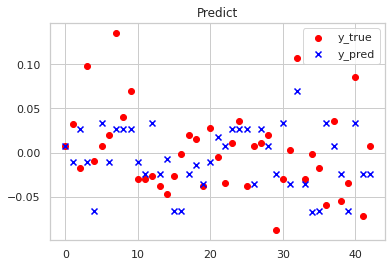

In [302]:
plot(y_test, y_pred)